In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

In [5]:
data = Table.read('/arc/home/aydanmckay/phottable_cuts_intersect_renamed.fits').to_pandas()

w1_desi, w2_desi, w1_desi_err, w2_desi_err \
w1_wise, w1_wise_err, w2_wise, w2_wise_err \
i_ps3, i_ps3_err \
i_ps1, i_ps1_err, i_ps1_flag

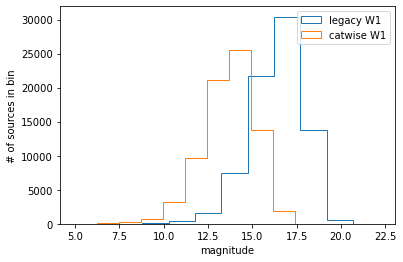

In [43]:
data['w1_desi'] = data['w1_desi'].replace(to_replace=np.inf, value=np.nan)
plt.hist(data['w1_desi'],label='legacy W1',histtype='step')
plt.hist(data['w1_wise'],label='catwise W1',histtype='step')
plt.xlabel('magnitude')
plt.ylabel('# of sources in bin')
plt.legend()
# plt.savefig('w1s.png')

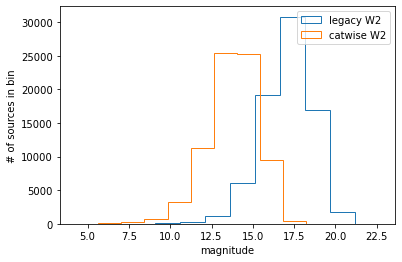

In [44]:
data['w2_desi'] = data['w2_desi'].replace(to_replace=np.inf, value=np.nan)
plt.hist(data['w2_desi'],label='legacy W2',histtype='step')
plt.hist(data['w2_wise'],label='catwise W2',histtype='step')
plt.xlabel('magnitude')
plt.ylabel('# of sources in bin')
plt.legend()
# plt.savefig('w2s.png')

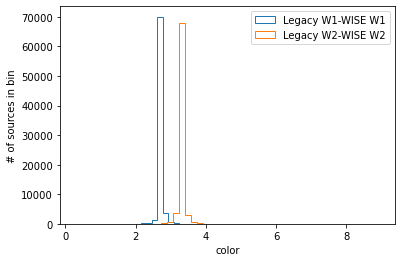

In [48]:
plt.hist(data['w1_desi']-data['w1_wise'],label='Legacy W1-WISE W1',bins=50,histtype='step')
plt.hist(data['w2_desi']-data['w2_wise'],label='Legacy W2-WISE W2',bins=50,histtype='step')
plt.xlabel('color')
plt.ylabel('# of sources in bin')
plt.legend()
# plt.savefig('w1-w2snew.png')

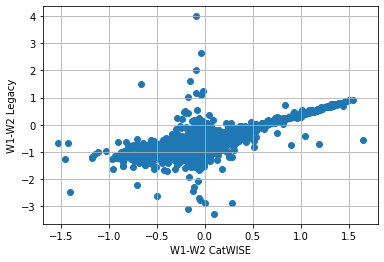

In [50]:
plt.scatter(data['w1_wise']-data['w2_wise'],data['w1_desi']-data['w2_desi'])
plt.grid()
plt.xlabel('W1-W2 CatWISE')
plt.ylabel('W1-W2 Legacy')
plt.savefig('scattercolorw1w2')

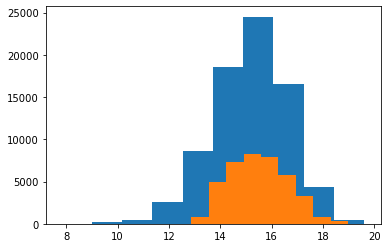

In [27]:
datatab = Table.from_pandas(data)
pans = []
# for dr1,dr3 in zip(data['i_ps1'],data['i_ps3']):
#     # print(dr1,dr3)
#     if np.isnan(dr3) == False:
#         pans.append(dr3)
        
#     else:
#         pans.append(dr1)

# datatab.add_column(pans, name='i_pans', index=-1)
hist1 = plt.hist(data['i_ps1'])
hist2 = plt.hist(data['i_ps3'])

In [32]:
min(data['i_ps1_flag'])

0

Maybe I need to reevaluate how I xmatched the panstarrs dr1 to the table, it shouldn't be included in the intersection plot. \
Only a difference in amount of rows of 171. So I don't know if its that big of a deal actually.

In [24]:
sum(hist1[0])

76219.0

In [22]:
sum(hist2[0])

39591.0

Plan for tomorrow: mask the data according to the i band flags in ps1, then make a new column of pans measurements, then we should have the completed phot table.